<h3><center>Aung Naing Oo | Visualisation Lab Submission</center></h3><hr/>
<h3><center>Applied Data Mining</center></h3>
<h3><center>Visualization</center></h3>
<img src="visualization.png" width="800px" />

Data visualization is an essential process in data science. The purpose of visualization is to gain insight from the data. Data scientists use visualization to perform explorative analysis, confirm their theories, and present ideas. This assignment is designed to make you familiar with a set of useful approaches for visualizing data of higher dimensions.

Following is the list of tasks with a brief description:
1. __Task A__
    - You will use a group of visualization techniques (histogram, heatmap, piechart, parallel coordinates, etc.) to gain insight into the tabular data.
1. __Task B__
    - You will answer questions on the differences between PCA and TSNE visualizations on a sample s-curve distribution.
1. __Task C__
    - Again, you will compare PCA and TSNE visualizations, but this time on the MNIST dataset.
1. __Task D__
    - You will investigate the effect of the perplexity parameter on the TSNE visualizations.
    
Now, let's start by importing the required libraries using the code below.

__Note__: you may need to install the missing libraries

In [2]:
from __future__ import print_function
import random
from time import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D
from collections import OrderedDict
from functools import partial
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# For reproducability of the results

random.seed(42)
np.random.seed(42)
pd.set_option('display.max_columns', None)

# TASK A
### Use different visualization techniques to gain insight into the data

This task includes ten questions.

In the previous lab, you applied some pre-processing techniques on the KDD dataset. Now, we will try to apply some visualizations to the data to get more insight. Use the code below to load the dataset:

In [6]:
# read the dataset using pandas library

data = pd.read_csv('lab2_data/nsl-kdd-original.csv')
data.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,252,10112.025390,4709.134766,2,1,39.928778,52.241000,2223.730342,82.550500,255,3984155503,1796040391,255,0.172934,0.119331,0.053603,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,254,252,6039.783203,3892.583740,2,1,68.267778,81.137711,4286.828570,119.422719,255,1787309226,1767180493,255,0.143337,0.069136,0.074201,53,44,0,0,43,1,1,1,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,254,252,7377.527344,4754.747070,2,1,55.794000,66.054141,3770.580726,118.962633,255,205985702,316006300,255,0.116615,0.059195,0.057420,53,44,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,254,252,7087.796387,4568.018555,2,1,60.210889,68.109000,4060.625597,106.611547,255,884094874,3410317203,255,0.118584,0.066133,0.052451,53,44,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,254,252,14875.120120,6927.291016,2,1,27.505111,39.106801,1413.686415,57.200395,255,3368447996,584859215,255,0.087934,0.063116,0.024818,53,45,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0


In [5]:
# we reduce the size of the data for the sake of speed

print(data.shape)
data = data.sample(n=10000)
print(data.shape)

(175341, 45)
(10000, 45)


1. You are probably familiar with the challenges of imbalanced classification. Therefore it is important to check the label proportions before we start. Now, check how much the two classes of labels are imbalanced in our dataset by plotting a histogram of the label column using pandas `hist` function.

<AxesSubplot:>

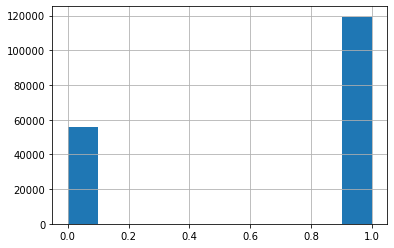

In [12]:
# your code
data['label'].hist()

2. Then use the `hist` function of the `pandas` library to plot different attack categories. You should look at the `attack_cat` column.

<AxesSubplot:>

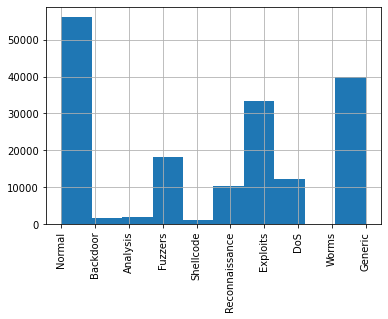

In [20]:
# your code
data['attack_cat'].hist(xrot=90)

For the next question, we are going to use the `Titanic` dataset. This dataset includes a sample of passenger details on board of notorious Titanic ship. Run the following code to load the dataset:

In [23]:
# Reading data
data = pd.read_csv("lab2_data/Titanic.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Based on the Titanic data, answer the following questions:
3. Use a visualization method to plot the patterns of missing values occurring in the dataset. How many columns have missing values?

__Hint__: You can use the `heatmap` method from the `seaborn` library.

<AxesSubplot:>

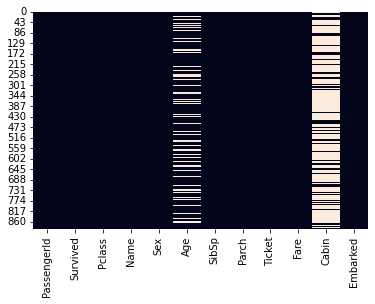

In [26]:
# your code
sns.heatmap(data.isnull(), cbar=False) #white highlights indicate blank values

4. Use visualization to show what sorts of people were more likely to survive? (what genders and what classes of tickets)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

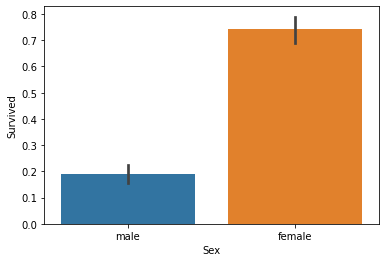

In [28]:
# Sex vs Survived

# your code
sns.barplot(x='Sex', y='Survived', data=data)


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

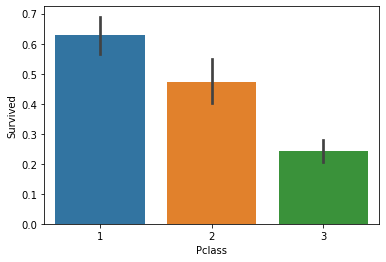

In [29]:
# Pclass vs Survived

# your code
sns.barplot(x='Pclass', y='Survived', data=data)

Now, use `London’s Recorded Crime` Summary dataset to answer the next questions. According to the crime type, this dataset counts the number of crimes at three different geographic levels of London (Borough, Ward, LSOA) per month. Use the code below to load the dataset:

In [37]:
# Reading data
data = pd.read_csv("lab2_data/MPS_Borough_Level_Crime_Historic.csv")

5. Draw a pie chart to illustrate the number of crimes in Aug 2015 by the minor category.

__Hint__: First prepare the data in a dataframe (`data1`). Then use `plt.pie` command to draw the chart

In [44]:
# uncomment the code below and fill in the balnks

data1 = data[['201508','Minor Category']].groupby('Minor Category',as_index=False).sum()
data1

,Minor Category,201508
0,Assault with Injury,3973
1,Burglary in Other Buildings,2089
2,Burglary in a Dwelling,3286
3,Business Property,144
4,Common Assault,5180
5,Counted per Victim,0
6,Criminal Damage To Dwelling,1168
7,Criminal Damage To Motor Vehicle,2059
8,Criminal Damage To Other Building,494
9,Drug Trafficking,337


Next, use the `pie` chart to visualize labels and sizes.

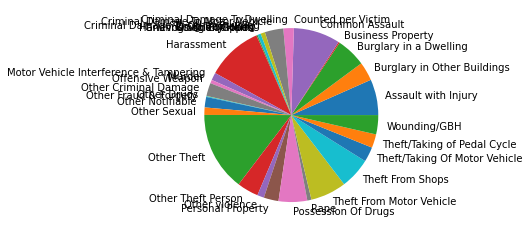

In [65]:
# uncomment the following two lines of code
labels = data1['Minor Category']
sizes = data1['201508']

# your code
plt.pie(sizes, labels = labels)
plt.show()

6. Plot histogram for August 2016 and determine if the distribution is normally distributed or not. Try different values for the `bins` parameter and interpret the effect.

'\nThe distribution is right skewed\n'

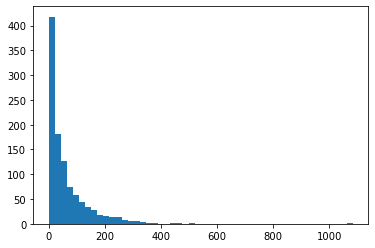

In [85]:
# uncomment the code below and fill in the balnks
data = pd.read_csv("lab2_data/MPS_Borough_Level_Crime_Historic.csv")
data2 = data['201608']
_,_,_ = plt.hist(data2, bins=50)

'''
The distribution is right skewed
'''

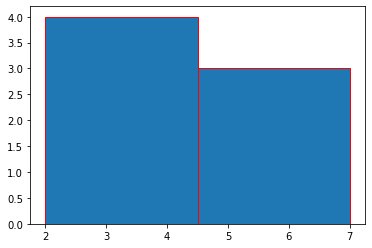

In [82]:
'''
Just experimenting for my own understanding
'''

import matplotlib.pyplot as plt
  
height = [2,3,4,5,6,7,2.5]
  
plt.hist(height, edgecolor="red", bins=2)
plt.show()

Finally, run the next code cell to load the `Iris` dataset into the `data` variable and answer the rest of this task's questions. You only need the first five columns of the file. 

__Note:__ You might need to install `xlrd` library.

In [113]:
import xlrd
data = pd.read_excel("lab2_data/Iris.xls")
data = data[['sepal length', 'sepal width', 'petal length', 'petal width', 'iris']]
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Based on the data, answer the following questions:

7. Draw a `box plot` displaying all variables and check which variable has the most outliers.

<AxesSubplot:>

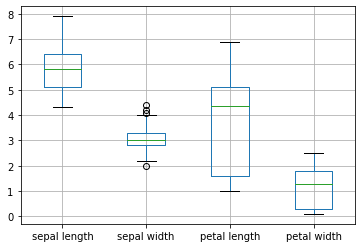

In [89]:
# your code
data.boxplot()

'''
Sepal Width Variable has the most outliers
'''

8. Visualize the correlation between `sepal length` and `sepal width` on the `Iris-setosa` category by drawing a `scatter` plot.

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

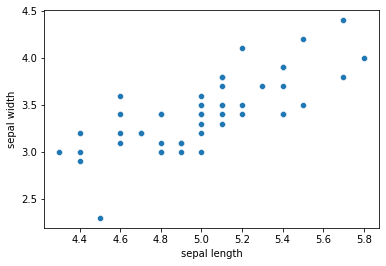

In [102]:
# your code
data_iris_setosa = data[data['iris'] == 'Iris-setosa']
sns.scatterplot(data=data_iris_setosa, x="sepal length", y="sepal width")


9. Ues parallel coordinates technique to plot the data. Can you tell which attributes seem most promising for different species classification just by looking at the plot?

'\npetal length and petal width would be the most promising for classification of different species. These features do not yield\nas many line overlaps as the other two. \n'

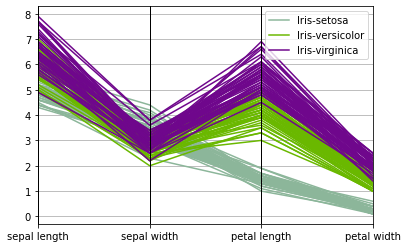

In [121]:
# your code
from pandas.plotting import parallel_coordinates
parallel_coordinates(data,'iris')

'''
petal length and petal width would be the most promising for classification of different species. These features do not yield
as many line overlaps as the other two. 
'''

10. Plot pairwise relationships in the dataset using `sns.pairplot`.

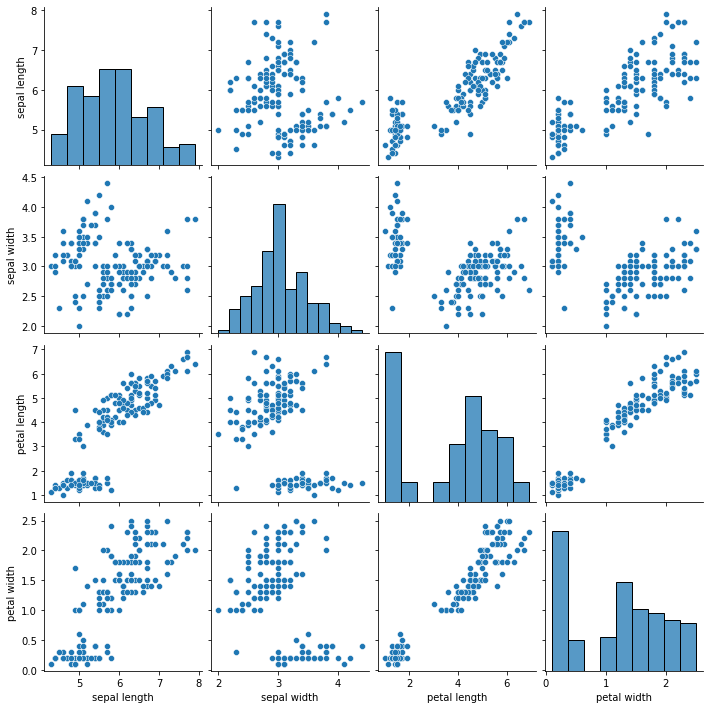

In [120]:
# your code
sns.pairplot(data)

# TASK B
### Comparing PCA and TSNE visualizations on s-curve distribution

This task includes two questions.

In this task, you do not need to do any programming. Just run the code provided for you, look at the produced plots, and answer the questions.
We will use a particular distribution called `s-curve`. Use the following cell to load the data and plot it. As you can see, the dataset has three dimensions.

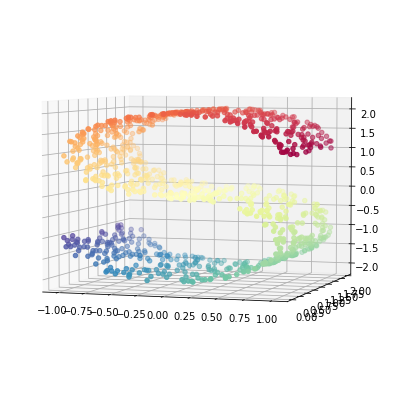

In [184]:
n_points = 1000
n_components = 2
X, color = datasets.make_s_curve(n_points, random_state=0)

# Create figure
fig = plt.figure(figsize=(7, 7))

# Add 3d scatter plot
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)



The next code cell computes PCA on the data. Moreover, we plot two components that the PCA algorithm produces.

__Note__: we only look at the two dimensions of the dataset. 

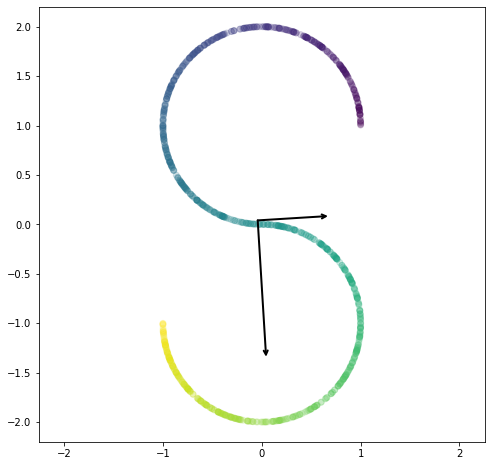

In [123]:
# for now we only consider two dimensions
X1 = np.delete(X, 1, axis = 1)

fig = plt.figure(figsize=(8, 8))
pca = PCA(n_components=2)
pca.fit(X1)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2, c=color)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
_ = plt.axis('equal')

1. What do the vectors (PCA components) represent?

> The PCA components represent the direction of the new features

The following code aims to project the data into 2D space with two methods: `PCA` and `TSNE`.

t-SNE_p_30: 3.4 sec
PCA: 0.002 sec


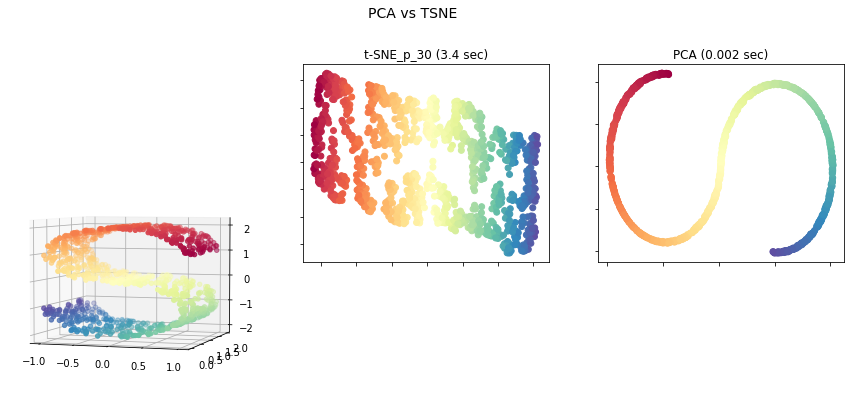

In [185]:
# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("PCA vs TSNE", fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

methods = OrderedDict()
methods['t-SNE_p_30'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0, perplexity=30)
methods['PCA'] = PCA(n_components=n_components, random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, 2 + i)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

2. Based on what you observe, which method (`PCA` or `TSNE`), you think, performed better to reduce the `crowding` problem? Why?

According to the observation, PCA performs better because the 'S' shape can be clearly seen projected from a 3d space to a 2d space. While t-SNE produces multiple mappings without any clearly visualisation of what the projection is. 

# TASK C 
### Comparing PCA and TSNE visualizations on mnist dataset

In this task, we will use a random subset of the `MNIST` dataset. The MNIST database is a large database of images from handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

Run the following code cell to load the dataset.

In [131]:
df_subset = pd.read_csv('lab2_data/MNIST_data_subset.csv', index_col = 0)
data_subset = df_subset.drop(columns=['y', 'label'])

You can see samples of the images in the dataset by running the code below:

<Figure size 432x288 with 0 Axes>

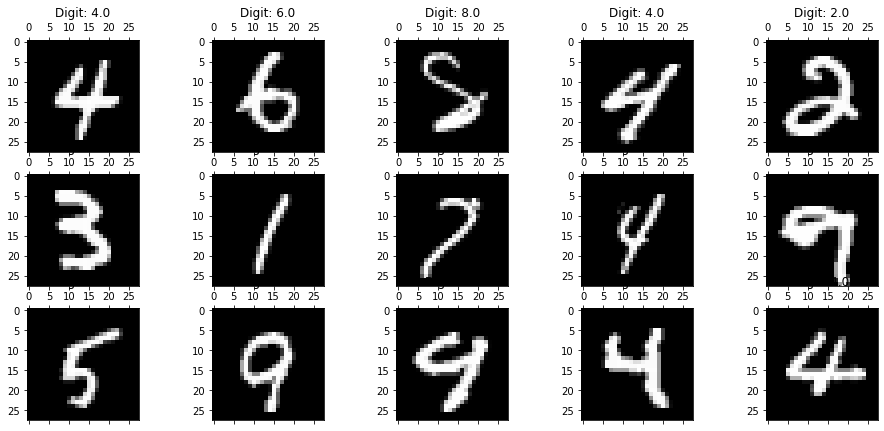

In [125]:
feat_cols = data_subset.columns
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df_subset.loc[df_subset.index[i],'label'])) )
    ax.matshow(df_subset.loc[df_subset.index[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

As you can see, each row of the dataset contains an image with the size of (28,28) pixels. Obviously, it is not possible to visualize this number of features.

Your task is to use both `PCA` and `TSNE` methods to first reduce the number of attributes to `3`, and then plot the dataset. We are interested in comparing two approaches to see which one produces better visualization of the data.

__Note:__ Applying `TSNE` directly on the whole feature set takes a lot of time to finish. To fix the issue, you must first reduce the number of features to 50 (using `PCA`) and then apply `TSNE`.

__Note:__ use different colors to display samples from each class.

first, produce a 3D plot of the dataset by applying PCA (reduce the number of features to 3)

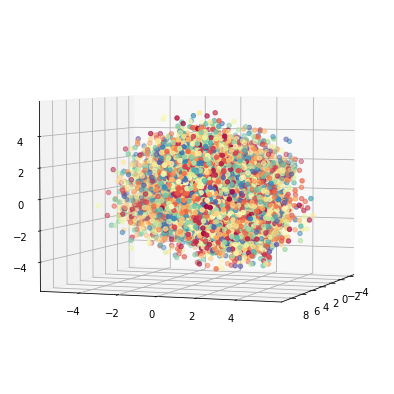

In [186]:
# PCA Standalone

n_points = 9271
n_components = 3
X, color = datasets.make_s_curve(n_points, random_state=0)

# for now we only consider two dimensions
#X1 = np.delete(X, 1, axis = 1)
df_subset = pd.read_csv('lab2_data/MNIST_data_subset.csv', index_col = 0)
data_subset = df_subset.drop(columns=['y', 'label'])

#fig = plt.figure(figsize=(8, 8))
pca = PCA(n_components=3)
pca_fitted = pca.fit_transform(data_subset)


# Create figure
fig = plt.figure(figsize=(7, 7))

# Add 3d scatter plot
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(pca_fitted[:, 0], pca_fitted[:, 1], pca_fitted[:, 2],c=color,cmap=plt.cm.Spectral)
ax.view_init(4, 20)





then produce a 3D plot of the dataset by applying TSNE (reduce the number of features to 3 directly)

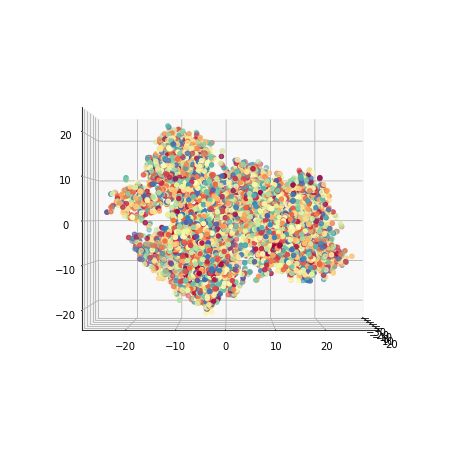

In [187]:
# TSNE Standlone
df_subset = pd.read_csv('lab2_data/MNIST_data_subset.csv', index_col = 0)
data_subset = df_subset.drop(columns=['y', 'label'])


# Create figure
fig = plt.figure(figsize=(15, 8))
model = manifold.TSNE(n_components=3,random_state=0)
tsne_data = model.fit_transform(data_subset)

#Y = method.fit_transform(tsne_data)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2],c=color, cmap=plt.cm.Spectral)
ax.view_init(0, 0)

Finally, produce another 3D plot of the dataset by first applying PCA (reduce the number of features to 50)
and then TSNE on top of PCA (reduce the number of features from 50 to 3)

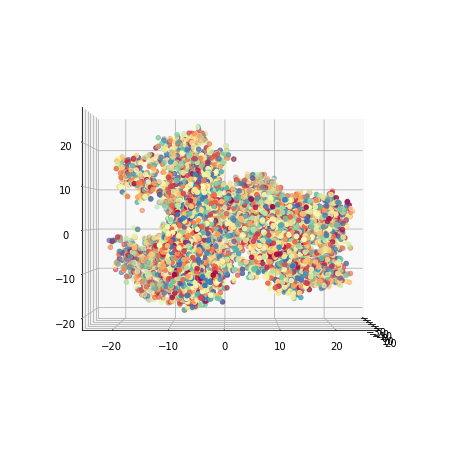

In [188]:
# PCA + TSNE
df_subset = pd.read_csv('lab2_data/MNIST_data_subset.csv', index_col = 0)
data_subset = df_subset.drop(columns=['y', 'label'])

fig = plt.figure(figsize=(15, 8))
pca = PCA(n_components=50)
pca_fitted = pca.fit_transform(data_subset)

model = manifold.TSNE(n_components=3,random_state=0)
tsne_data = model.fit_transform(pca_fitted)

#Y = method.fit_transform(tsne_data)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2],c=color, cmap=plt.cm.Spectral)
ax.view_init(0, 0)

<Figure size 1080x576 with 0 Axes>

1. What conclusions can you draw by comparing the three previous plots in terms of __visualization__ and __time complexity__?

>
PCA performs the fastest but is unable to accurately plot the different classes of pixels. 

>
t-SNE performs slower despite reduction of features to three. However, it produces a more differentiable plot than PCA showing different classes that can be seen in different regions of the graph. 

>
PCA combined with t-SNE produces the best results. This is because the classes are more differentiable across the regions on the graph. In terms of time complexity, it is still slower than standalone application of PCA but takes the same time as standalone application of TSNE. 


# TASK D
### Investigating the effect of perplexity parameter in TSNE

The final task includes just one question that you need to answer. You do not need to do any programming. Just run the code provided for you and answer the question.

We are interested in investigating the differences between using small and large `perplexity` and `n_iter` parameters in `TSNE` plots. To demonstrate this, let us simulate a dataset with six 10-dimensional Gaussian balls (𝑛=1000 in each ball) located very far away from each other.

In [194]:
sns.set_style('ticks')

col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

n = 1000  # sample size per class
p = 10    # dimensionality
k = 6     # number of classes
d = 10    # distance between each class mean and 0

X = np.random.randn(k*n, p)
for i in range(k):
    X[i*n:(i+1)*n, i] += d
print(X.shape)

(6000, 10)


Now we will try to reconstruct the original data running TSNE with different perplexity values: 5, 30, 100, and n_iter values: 300, 600, 900.

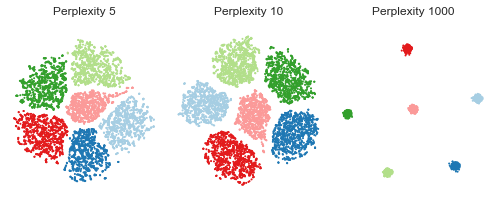

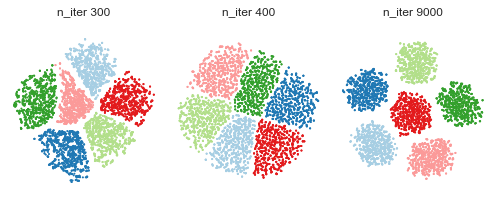

In [199]:
# perplexity

perpl = [5, 10, 1000]
Z1 = []
for p in perpl:
    tsne = TSNE(n_components=2, verbose=0, perplexity=p, n_iter=300)
    Z = tsne.fit_transform(X)
    Z1.append(Z)

fig = plt.figure(figsize=(7, 3))

for i,Z in enumerate(Z1):
    plt.subplot(1,3,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=col[np.floor(np.arange(n*k)/n).astype(int)])
    plt.title('Perplexity {}'.format(perpl[i]))
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

sns.despine(left=True, bottom=True)
plt.tight_layout()

# n_iter parameter

n_iters = [300, 400, 9000]
Z1 = []
for nn in n_iters:
    tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=nn)
    Z = tsne.fit_transform(X)
    Z1.append(Z)

fig = plt.figure(figsize=(7, 3))

for i,Z in enumerate(Z1):
    plt.subplot(1,3,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=col[np.floor(np.arange(n*k)/n).astype(int)])
    plt.title('n_iter {}'.format(n_iters[i]))
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

sns.despine(left=True, bottom=True)
plt.tight_layout()

1. Based on what you observe, how do you interpret the effect of increasing values of `perplexity` and `n_iter` parameters?

>
A very high perplexity value will distant the classes (6 of them in our case) very far apart but reduce the distance between neighbours in each class to a minimum, resulting in loss of local structure. 

A similar effect is observed when n_iter parameter is very large. 


There is a long-standing hypothesis that TSNE may preserve more of a global data structure at large `perplexity`. To demonstrate this, let us simulate 3 Gaussian blobs (1000 points each) of 2D data points: two blobs close to each other and far away from the third one.

(1500, 5)


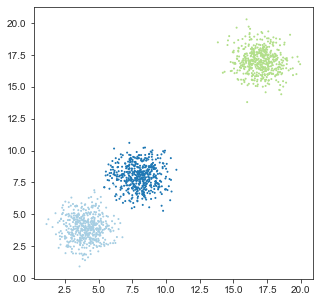

In [200]:
n = 500  # sample size per class
p = 5     # dimensionality
k = 3     # number of classes
dn = 4    # distance between near classes mean and 0
df = 17   # distance between far classes mean and 0

X = np.random.randn(k*n, p)
i = 0
X[i*n:(i+1)*n, 0] += dn
X[i*n:(i+1)*n, 1] += dn
i = 1
X[i*n:(i+1)*n, 0] += 2 * dn
X[i*n:(i+1)*n, 1] += 2 * dn
i = 2
X[i*n:(i+1)*n, 0] += df
X[i*n:(i+1)*n, 1] += df

print(X.shape)
fig = plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], s=1, c=col[np.floor(np.arange(n*k)/n).astype(int)])

Now we will try to reconstruct the original data running tSNE with different perplexity values: 10, 30, 100, and 800.

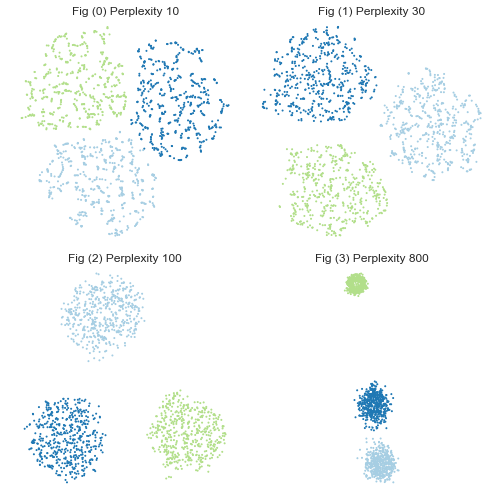

In [202]:
# perplexity parameter

perpl = [10, 30, 100, 800]
Z1 = []
for p in perpl:
    tsne = TSNE(n_components=2, verbose=0, perplexity=p, n_iter=300, random_state = 42)
    Z = tsne.fit_transform(X)
    Z1.append(Z)

fig = plt.figure(figsize=(7, 7))

for i,Z in enumerate(Z1):
    plt.subplot(2,2,i+1)
    plt.axis('equal')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=col[np.floor(np.arange(n*k)/n).astype(int)])
    plt.title('Fig ({}) Perplexity {}'.format(i, perpl[i]))
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

sns.despine(left=True, bottom=True)
plt.tight_layout()

### TSNE Resembles PCA at Large Perplexity
If we initialize `TSNE` with a `PCA` and __increase perplexity__, we are at __risk__ of ending up with a PCA plot but not a TSNE. The Perplexity value is a __trade-off__ between keeping local structure or global structure, i.e.; we need to tune it for our task. However, it is essential not to use big values for this parameter since we do not want to degrade TSNE to a normal PCA. Obviously, it is more efficient and much faster to use PCA in those situations directly. The recommendations are to not set this value to more than 50.

The code below applies `PCA` and reconstructs the data. By comparing the plot down with the one above, you should be able to see the similarity between using `PCA` and applying `TSNE` with very large values of `perplexity` i.e., Fig (3).

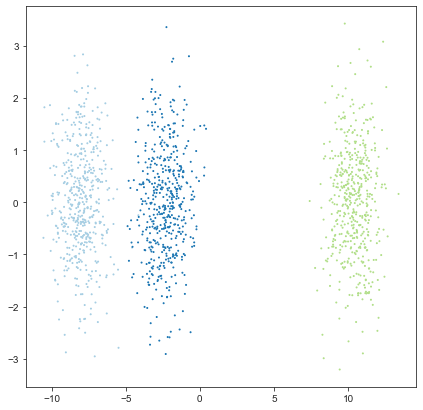

In [203]:
# check if for high values of perplexity we get something similar to PCA

pca = PCA(n_components=2)
Z = pca.fit_transform(X)
fig = plt.figure(figsize=(7, 7))
plt.scatter(Z[:,0], Z[:,1], s=1, c=col[np.floor(np.arange(n*k)/n).astype(int)])
plt.show()

<div class="alert alert-block alert-danger">

__IMPORTANT__ 

Please complete this Jupyter Notebook file and upload it to the __Blackboard__. 

__Change the name of your notebook file__ as follows: "`ADM_visualization_FirstName_Surname.ipynb`".

</div>